### Importing the required modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

### Importing and understanding the dataset

In [2]:
df = pd.read_excel('SoftDrinkData.xlsx')

In [3]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Beverage Brand,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,BevCo,1185732,2022-01-01,Northeast,New York,New York,Coca-Cola,0.50,12000,6000.0,3000.00,0.50
1,BevCo,1185732,2022-01-02,Northeast,New York,New York,Diet Coke,0.50,10000,5000.0,1500.00,0.30
2,BevCo,1185732,2022-01-03,Northeast,New York,New York,Sprite,0.40,10000,4000.0,1400.00,0.35
3,BevCo,1185732,2022-01-04,Northeast,New York,New York,Fanta,0.45,8500,3825.0,1338.75,0.35
4,BevCo,1185732,2022-01-05,Northeast,New York,New York,Powerade,0.60,9000,5400.0,1620.00,0.30


In [4]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")

In [5]:
df.head()

,retailer,retailer_id,invoice_date,region,state,city,beverage_brand,price_per_unit,units_sold,total_sales,operating_profit,operating_margin
0,BevCo,1185732,2022-01-01,Northeast,New York,New York,Coca-Cola,0.50,12000,6000.0,3000.00,0.50
1,BevCo,1185732,2022-01-02,Northeast,New York,New York,Diet Coke,0.50,10000,5000.0,1500.00,0.30
2,BevCo,1185732,2022-01-03,Northeast,New York,New York,Sprite,0.40,10000,4000.0,1400.00,0.35
3,BevCo,1185732,2022-01-04,Northeast,New York,New York,Fanta,0.45,8500,3825.0,1338.75,0.35
4,BevCo,1185732,2022-01-05,Northeast,New York,New York,Powerade,0.60,9000,5400.0,1620.00,0.30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   retailer          9648 non-null   object        
 1   retailer_id       9648 non-null   int64         
 2   invoice_date      9648 non-null   datetime64[ns]
 3   region            9648 non-null   object        
 4   state             9648 non-null   object        
 5   city              9648 non-null   object        
 6   beverage_brand    9648 non-null   object        
 7   price_per_unit    9648 non-null   float64       
 8   units_sold        9648 non-null   int64         
 9   total_sales       9648 non-null   float64       
 10  operating_profit  9648 non-null   float64       
 11  operating_margin  9648 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 904.6+ KB


In [7]:
df['units_sold'] = df['units_sold'].astype(float)

In [8]:
df.duplicated().sum()

np.int64(0)

#### understanding categorical feature distribution

In [9]:
df['retailer'].value_counts(ascending=False)

retailer
BevCo        2618
West Soda    2374
FizzyCo      2017
Target       1030
Amazon       1005
Walmart       604
Name: count, dtype: int64

In [10]:
df['region'].value_counts(ascending=False)

region
West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: count, dtype: int64

In [11]:
df['state'].nunique()

50

In [12]:
df['city'].nunique()

52

In [13]:
df['beverage_brand'].value_counts(ascending=False)

beverage_brand
Coca-Cola       1610
Diet Coke       1610
Sprite          1608
Dasani Water    1608
Fanta           1606
Powerade        1606
Name: count, dtype: int64

#### understanding numerical feature distribution

In [14]:
df.head()

,retailer,retailer_id,invoice_date,region,state,city,beverage_brand,price_per_unit,units_sold,total_sales,operating_profit,operating_margin
0,BevCo,1185732,2022-01-01,Northeast,New York,New York,Coca-Cola,0.50,12000.0,6000.0,3000.00,0.50
1,BevCo,1185732,2022-01-02,Northeast,New York,New York,Diet Coke,0.50,10000.0,5000.0,1500.00,0.30
2,BevCo,1185732,2022-01-03,Northeast,New York,New York,Sprite,0.40,10000.0,4000.0,1400.00,0.35
3,BevCo,1185732,2022-01-04,Northeast,New York,New York,Fanta,0.45,8500.0,3825.0,1338.75,0.35
4,BevCo,1185732,2022-01-05,Northeast,New York,New York,Powerade,0.60,9000.0,5400.0,1620.00,0.30


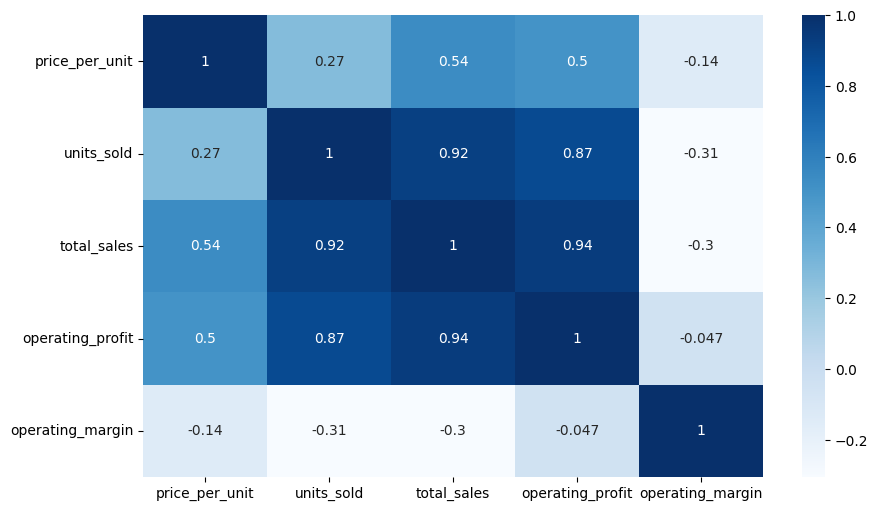

In [15]:
dfnums = df.iloc[:,7:12]
plt.figure(figsize=(10,6))
sns.heatmap(dfnums.corr(), annot=True, cmap='Blues')
plt.show()

#### conclusions
- units sold is strongly correlated with profit (0.87), confirming that volume of sales is a key profit driver.
- total sales is the strongest predictor of profit (0.94), making it the most valuable feature for modeling operating profit.
- there is strong multicollinearity between total_sales and units_sold due to total_sales = price × units.
- due to price x units there is a need to check for multicollinearity between price_per_units, units_sold and total_sales.
- operating margin's near-zero correlation with operating profit (-0.047) makes it an ineffective predictor hence should likely be excluded from the features.

### Pre-modelling numerical feature analysis

#### checking for multicollinearity between price_per_unit, units_sold and total_sales

In [16]:
dfnums = df[['price_per_unit', 'units_sold', 'total_sales']]
vif_data = pd.DataFrame()
vif_data["feature"] = dfnums.columns
vif_data["VIF"] = [variance_inflation_factor(dfnums.values, i) for i in range(dfnums.shape[1])]

In [17]:
vif_data

,feature,VIF
0,price_per_unit,2.685326
1,units_sold,12.558560
2,total_sales,12.641285


#### checking for multicollinearity between price_per_unit and units_sold

In [18]:
dfnums = df[['price_per_unit', 'units_sold']]
vif_data = pd.DataFrame()
vif_data["feature"] = dfnums.columns
vif_data["VIF"] = [variance_inflation_factor(dfnums.values, i) for i in range(dfnums.shape[1])]

In [19]:
vif_data

,feature,VIF
0,price_per_unit,2.584913
1,units_sold,2.584913


When including only price_per_unit and units_sold, VIF values are low (2.58), indicating no multicollinearity concerns. However, adding total_sales causes VIF to spike above 12 for both units_sold and total_sales, confirming severe multicollinearity since total_sales is mathematically derived from the other two features. Hence, it is optimal to drop total_sales from features.

#### outlier analysis

In [20]:
outliers = []
outliersp = []
dfnums = df[['price_per_unit','units_sold']]
for col in dfnums.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_rows = df[(df[col] < lower) | (df[col] > upper)]
    outliers.append(outlier_rows.shape[0])
    percentage = (outlier_rows.shape[0]/df[col].shape[0]) * 100
    outliersp.append(round(percentage,2))

print("done")

done


In [21]:
print(outliers)
print(outliersp)

[81, 508]
[0.84, 5.27]


### Pre-modelling categorical feature encoding

#### Feature Engineering from Invoice Date: Seasonality and Year Extraction

In [22]:
df.head()

,retailer,retailer_id,invoice_date,region,state,city,beverage_brand,price_per_unit,units_sold,total_sales,operating_profit,operating_margin
0,BevCo,1185732,2022-01-01,Northeast,New York,New York,Coca-Cola,0.50,12000.0,6000.0,3000.00,0.50
1,BevCo,1185732,2022-01-02,Northeast,New York,New York,Diet Coke,0.50,10000.0,5000.0,1500.00,0.30
2,BevCo,1185732,2022-01-03,Northeast,New York,New York,Sprite,0.40,10000.0,4000.0,1400.00,0.35
3,BevCo,1185732,2022-01-04,Northeast,New York,New York,Fanta,0.45,8500.0,3825.0,1338.75,0.35
4,BevCo,1185732,2022-01-05,Northeast,New York,New York,Powerade,0.60,9000.0,5400.0,1620.00,0.30


In [23]:
df['year'] = df['invoice_date'].dt.year

In [24]:
df.head()

,retailer,retailer_id,invoice_date,region,state,city,beverage_brand,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,year
0,BevCo,1185732,2022-01-01,Northeast,New York,New York,Coca-Cola,0.50,12000.0,6000.0,3000.00,0.50,2022
1,BevCo,1185732,2022-01-02,Northeast,New York,New York,Diet Coke,0.50,10000.0,5000.0,1500.00,0.30,2022
2,BevCo,1185732,2022-01-03,Northeast,New York,New York,Sprite,0.40,10000.0,4000.0,1400.00,0.35,2022
3,BevCo,1185732,2022-01-04,Northeast,New York,New York,Fanta,0.45,8500.0,3825.0,1338.75,0.35,2022
4,BevCo,1185732,2022-01-05,Northeast,New York,New York,Powerade,0.60,9000.0,5400.0,1620.00,0.30,2022


In [25]:
df['month'] = df['invoice_date'].dt.month

In [26]:
df.head()

,retailer,retailer_id,invoice_date,region,state,city,beverage_brand,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,year,month
0,BevCo,1185732,2022-01-01,Northeast,New York,New York,Coca-Cola,0.50,12000.0,6000.0,3000.00,0.50,2022,1
1,BevCo,1185732,2022-01-02,Northeast,New York,New York,Diet Coke,0.50,10000.0,5000.0,1500.00,0.30,2022,1
2,BevCo,1185732,2022-01-03,Northeast,New York,New York,Sprite,0.40,10000.0,4000.0,1400.00,0.35,2022,1
3,BevCo,1185732,2022-01-04,Northeast,New York,New York,Fanta,0.45,8500.0,3825.0,1338.75,0.35,2022,1
4,BevCo,1185732,2022-01-05,Northeast,New York,New York,Powerade,0.60,9000.0,5400.0,1620.00,0.30,2022,1


In [27]:
def map_season(month):
    if month in [1, 2, 3, 4]:
        return 'Spring'
    elif month in [5, 6, 7, 8]:
        return 'Summer'
    else:
        return 'Winter'

df['season'] = df['month'].apply(map_season)

In [28]:
df.head()

,retailer,retailer_id,invoice_date,region,state,city,beverage_brand,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,year,month,season
0,BevCo,1185732,2022-01-01,Northeast,New York,New York,Coca-Cola,0.50,12000.0,6000.0,3000.00,0.50,2022,1,Spring
1,BevCo,1185732,2022-01-02,Northeast,New York,New York,Diet Coke,0.50,10000.0,5000.0,1500.00,0.30,2022,1,Spring
2,BevCo,1185732,2022-01-03,Northeast,New York,New York,Sprite,0.40,10000.0,4000.0,1400.00,0.35,2022,1,Spring
3,BevCo,1185732,2022-01-04,Northeast,New York,New York,Fanta,0.45,8500.0,3825.0,1338.75,0.35,2022,1,Spring
4,BevCo,1185732,2022-01-05,Northeast,New York,New York,Powerade,0.60,9000.0,5400.0,1620.00,0.30,2022,1,Spring


In [29]:
df['season'].value_counts(ascending=False)

season
Spring    3280
Winter    3192
Summer    3176
Name: count, dtype: int64

### Model Workflow

#### feature and outcome selection

In [30]:
df.columns

Index(['retailer', 'retailer_id', 'invoice_date', 'region', 'state', 'city',
       'beverage_brand', 'price_per_unit', 'units_sold', 'total_sales',
       'operating_profit', 'operating_margin', 'year', 'month', 'season'],
      dtype='object')

In [31]:
X = df.loc[:,['price_per_unit', 'units_sold', 'retailer', 'region', 'beverage_brand', 'year','season']]
y = df.loc[:,'operating_profit']

In [32]:
X.head()

,price_per_unit,units_sold,retailer,region,beverage_brand,year,season
0,0.50,12000.0,BevCo,Northeast,Coca-Cola,2022,Spring
1,0.50,10000.0,BevCo,Northeast,Diet Coke,2022,Spring
2,0.40,10000.0,BevCo,Northeast,Sprite,2022,Spring
3,0.45,8500.0,BevCo,Northeast,Fanta,2022,Spring
4,0.60,9000.0,BevCo,Northeast,Powerade,2022,Spring


In [33]:
y.head()

0    3000.00
1    1500.00
2    1400.00
3    1338.75
4    1620.00
Name: operating_profit, dtype: float64

#### one hot encoding categorical features

In [34]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
encodertransform = encoder.fit_transform(X.iloc[:,2:7])
encodertransform.head(8)

,retailer_Amazon,retailer_BevCo,retailer_FizzyCo,retailer_Target,retailer_Walmart,retailer_West Soda,region_Midwest,region_Northeast,region_South,region_Southeast,...,beverage_brand_Dasani Water,beverage_brand_Diet Coke,beverage_brand_Fanta,beverage_brand_Powerade,beverage_brand_Sprite,year_2022,year_2023,season_Spring,season_Summer,season_Winter
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [35]:
encodertransform.columns

Index(['retailer_Amazon', 'retailer_BevCo', 'retailer_FizzyCo',
       'retailer_Target', 'retailer_Walmart', 'retailer_West Soda',
       'region_Midwest', 'region_Northeast', 'region_South',
       'region_Southeast', 'region_West', 'beverage_brand_Coca-Cola',
       'beverage_brand_Dasani Water', 'beverage_brand_Diet Coke',
       'beverage_brand_Fanta', 'beverage_brand_Powerade',
       'beverage_brand_Sprite', 'year_2022', 'year_2023', 'season_Spring',
       'season_Summer', 'season_Winter'],
      dtype='object')

In [36]:
#dropping one category to prevent dummy variable trap
X = pd.concat([X,encodertransform], axis=1).drop(columns=['retailer_Amazon','region_Midwest','beverage_brand_Coca-Cola','year_2022','season_Spring'])

In [37]:
X.head(8)

,price_per_unit,units_sold,retailer,region,beverage_brand,year,season,retailer_BevCo,retailer_FizzyCo,retailer_Target,...,region_Southeast,region_West,beverage_brand_Dasani Water,beverage_brand_Diet Coke,beverage_brand_Fanta,beverage_brand_Powerade,beverage_brand_Sprite,year_2023,season_Summer,season_Winter
0,0.50,12000.0,BevCo,Northeast,Coca-Cola,2022,Spring,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,10000.0,BevCo,Northeast,Diet Coke,2022,Spring,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.40,10000.0,BevCo,Northeast,Sprite,2022,Spring,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.45,8500.0,BevCo,Northeast,Fanta,2022,Spring,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.60,9000.0,BevCo,Northeast,Powerade,2022,Spring,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.50,10000.0,BevCo,Northeast,Dasani Water,2022,Spring,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.50,12500.0,BevCo,Northeast,Coca-Cola,2022,Spring,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.50,9000.0,BevCo,Northeast,Diet Coke,2022,Spring,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
X.columns

Index(['price_per_unit', 'units_sold', 'retailer', 'region', 'beverage_brand',
       'year', 'season', 'retailer_BevCo', 'retailer_FizzyCo',
       'retailer_Target', 'retailer_Walmart', 'retailer_West Soda',
       'region_Northeast', 'region_South', 'region_Southeast', 'region_West',
       'beverage_brand_Dasani Water', 'beverage_brand_Diet Coke',
       'beverage_brand_Fanta', 'beverage_brand_Powerade',
       'beverage_brand_Sprite', 'year_2023', 'season_Summer', 'season_Winter'],
      dtype='object')

In [39]:
#dropping the redudant columns
X.drop(columns = ['retailer', 'region', 'year', 'beverage_brand', 'year', 'season'], inplace=True)

#### train-test split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#### feature scaling

In [41]:
X_train.head()

,price_per_unit,units_sold,retailer_BevCo,retailer_FizzyCo,retailer_Target,retailer_Walmart,retailer_West Soda,region_Northeast,region_South,region_Southeast,region_West,beverage_brand_Dasani Water,beverage_brand_Diet Coke,beverage_brand_Fanta,beverage_brand_Powerade,beverage_brand_Sprite,year_2023,season_Summer,season_Winter
7337,0.24,720.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3248,0.30,3250.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9575,0.31,960.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
564,0.70,3500.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6066,0.51,910.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [42]:
scaler = RobustScaler()
X_train.iloc[:,0:2] = scaler.fit_transform(X_train.iloc[:,0:2])
X_train.head()

,price_per_unit,units_sold,retailer_BevCo,retailer_FizzyCo,retailer_Target,retailer_Walmart,retailer_West Soda,region_Northeast,region_South,region_Southeast,region_West,beverage_brand_Dasani Water,beverage_brand_Diet Coke,beverage_brand_Fanta,beverage_brand_Powerade,beverage_brand_Sprite,year_2023,season_Summer,season_Winter
7337,-1.05,-0.427984,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3248,-0.75,0.613169,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9575,-0.70,-0.329218,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
564,1.25,0.716049,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6066,0.30,-0.349794,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [43]:
#applying same scale transformation to X_test
X_test.iloc[:,0:2] = scaler.transform(X_test.iloc[:,0:2])
X_test.head()

,price_per_unit,units_sold,retailer_BevCo,retailer_FizzyCo,retailer_Target,retailer_Walmart,retailer_West Soda,region_Northeast,region_South,region_Southeast,region_West,beverage_brand_Dasani Water,beverage_brand_Diet Coke,beverage_brand_Fanta,beverage_brand_Powerade,beverage_brand_Sprite,year_2023,season_Summer,season_Winter
2264,1.25,1.230453,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1601,0.50,0.716049,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
775,1.00,2.670782,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2602,-1.00,0.818930,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5436,-0.35,-0.119342,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


#### Model Instantiation

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
#model testing
y_pred = model.predict(X_test)

#### Model Evaluation

In [46]:
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae = mean_absolute_error(y_test, y_pred)
print(f"r2 score: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

r2 score: 0.8429983810875593
RMSE: 188.74758906540228
MAE: 120.53296951393465


#### OLS analysis

In [49]:
X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const)
results = ols_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       operating_profit   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     2341.
Date:                Sun, 08 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:54:04   Log-Likelihood:                -51361.
No. Observations:                7718   AIC:                         1.028e+05
Df Residuals:                    7698   BIC:                         1.029e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

#### Findings:
The model achieved an R-squared of 0.852, explaining 85.2% of the variance in operating profit. With 7,718 observations and a highly significant F-statistic (p < 0.001), the model demonstrates strong predictive power.

**Primary Drivers:**
- Units_Sold (coef: 430.90, p < 0.001): The strongest predictor - each additional unit sold increases profit by $430.90.

- Price per Unit (coef: 215.63, p < 0.001): Each dollar increase in price adds $215.63 to profit.


**Next Steps:**
Refining the Model by Eliminating Statistically Insignificant Features to Improve Performance and Interpretability.


### Model Refinement: Removing Insignificant Predictors

In [48]:
X.head()

,price_per_unit,units_sold,retailer_BevCo,retailer_FizzyCo,retailer_Target,retailer_Walmart,retailer_West Soda,region_Northeast,region_South,region_Southeast,region_West,beverage_brand_Dasani Water,beverage_brand_Diet Coke,beverage_brand_Fanta,beverage_brand_Powerade,beverage_brand_Sprite,year_2023,season_Summer,season_Winter
0,0.50,12000.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,10000.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.40,10000.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.45,8500.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.60,9000.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [50]:
X.drop(columns=['retailer_BevCo', 'retailer_Target', 'region_Southeast', 'season_Summer', 'season_Winter'], inplace=True)

In [51]:
X.head()

,price_per_unit,units_sold,retailer_FizzyCo,retailer_Walmart,retailer_West Soda,region_Northeast,region_South,region_West,beverage_brand_Dasani Water,beverage_brand_Diet Coke,beverage_brand_Fanta,beverage_brand_Powerade,beverage_brand_Sprite,year_2023
0,0.50,12000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,10000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.40,10000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.45,8500.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.60,9000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### train-test split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#### feature scaling

In [53]:
scaler = RobustScaler()
X_train.iloc[:,0:2] = scaler.fit_transform(X_train.iloc[:,0:2])
X_train.head()

,price_per_unit,units_sold,retailer_FizzyCo,retailer_Walmart,retailer_West Soda,region_Northeast,region_South,region_West,beverage_brand_Dasani Water,beverage_brand_Diet Coke,beverage_brand_Fanta,beverage_brand_Powerade,beverage_brand_Sprite,year_2023
7337,-1.05,-0.427984,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3248,-0.75,0.613169,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9575,-0.70,-0.329218,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
564,1.25,0.716049,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6066,0.30,-0.349794,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [54]:
X_test.iloc[:,0:2] = scaler.transform(X_test.iloc[:,0:2])
X_test.head()

,price_per_unit,units_sold,retailer_FizzyCo,retailer_Walmart,retailer_West Soda,region_Northeast,region_South,region_West,beverage_brand_Dasani Water,beverage_brand_Diet Coke,beverage_brand_Fanta,beverage_brand_Powerade,beverage_brand_Sprite,year_2023
2264,1.25,1.230453,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1601,0.50,0.716049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
775,1.00,2.670782,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2602,-1.00,0.818930,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5436,-0.35,-0.119342,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


#### model Instantiation

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

#model training
y_pred = model.predict(X_test)

#### model evaluation

In [56]:
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae = mean_absolute_error(y_test, y_pred)
print(f"r2 score: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

r2 score: 0.8428282524632931
RMSE: 188.84982582429294
MAE: 120.652828441042


#### OLS analysis

In [57]:
X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const)
results = ols_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       operating_profit   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     3178.
Date:                Sun, 08 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:00:13   Log-Likelihood:                -51362.
No. Observations:                7718   AIC:                         1.028e+05
Df Residuals:                    7703   BIC:                         1.029e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Final Evaluation
Refining the model by removing non-significant variables led to a cleaner regression with equal performance but improved interpretability.

- Dropped 5 predictors that had high p-values (P > 0.05).
- R-squared remained unchanged at 0.852, showing no loss in model fit.
- F-statistic increased from 2341 to 3178, indicating stronger overall model significance.
- Final model retained only significant features, improving clarity and reducing noise.
- Seasonal and some retailer effects were found statistically insignificant and were excluded.

### Key Findings
Highly significant predictors (p < 0.001):
- price_per_unit and units_sold: still the strongest predictors of operating_profit.
- Specific dummy variables and most beverage_brand_* types significantly affect profit.
- year_2023 is significant (p = 0.010): suggesting a noticeable change in profit pattern between 2022 and 2023.

Coefficients now tell a cleaner evaluation. For example:
- Selling in region_South adds ~61.6 units of profit.
- Having Diet Coke as a brand reduces profit by ~82.9 units


_Detailed analysis and findings has been provided in the documentation._